<a href="https://colab.research.google.com/github/monimoyd/S9/blob/master/S9_Gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment S9 - (Gradcam Placeholder)
This notebook is for displaying Gradcam Pretrained model. The other notebook S9_main is for main training. We are still working integrating Gradcam with main model

In [1]:
%matplotlib inline
import autoreload
%load_ext autoreload
%autoreload

In [2]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-e2r1c1js
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-e2r1c1js
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98174 sha256=fbca8d9aba9d1e0c3034c3cf512f29a1b4cb2410b84b8bb5bf6f7dfb69de620e
  Stored in directory: /tmp/pip-ephem-wheel-cache-snot5vn5/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Mount the google drive

In [3]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Copy all the API python files from the google drive to local folder

Follwing python files are imported from google drive. Purpsoe of these files are as below:

model.py - Defines the model class Net
train_test.py- API for training and testing
accuracy_utils - API foro getting test accuracy and per class accuracy
data_loader.py - API for loading train and test data
data_transform.py - API for transforming and normalizing data
plot_metrics.py - API for plotting metrics

In [4]:
!cp -rf '/content/drive/My Drive/data_loaders' .
!cp -rf '/content/drive/My Drive/data_transformations' .
!cp -rf '/content/drive/My Drive/models' .
!cp -rf '/content/drive/My Drive/utils' .

## Import all the libraries

In [6]:
from PIL import Image
import cv2
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from data_transformations.data_transform_cifar10 import get_train_transform, get_test_transform
from data_loaders.cifar10_data_loader import get_train_loader, get_test_loader, get_classes
from models.resnet18 import ResNet18
from utils.train_test_utils import train,test
from utils.accuracy_utils import get_test_accuracy,get_accuracy_per_class
from utils.plot_metrics_utils import plot_loss_accuracy
from utils.misclassified_image_utils import  display_misclassfied_ciphar10_images
from utils.gradcam_utils import process_grad




In [ ]:
conter = 1


Training a Classifier
=====================



Training an image classifier
----------------------------

I have done the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data





 ## 1. Loading and normalizing CIFAR10

 I have used APIs get_train_loader, get_test_loader to load train data and test data respectively. Both the APIs internally uses torchvision. I have used get_transform API to transform tensors in the range [-1,1]



In [8]:
import main 
train_test_loader()
model = get_model_parameters()


Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


## Visualizing some of the images in train dataset



## 2. Define a Convolution Neural Network

I have defined the basic ResNet18 model and added dropout to it



In [9]:
summary(model, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
         Dropout2d-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
        Dropout2d-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1, 64,

/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


## 3. Define a Loss function and optimizer and train the model

I have used Classification Cross-Entropy loss and SGD with learning rate 0.01 with momentum 0.9.

## 4. Train the model

 I have used 40 epochs to train the model

In [10]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

epochs = 40
lr = 0.01
momentum = 0.9
train_losses, test_losses,train_acc,test_acc = perform_training(epochs,lr,momentum,train_losses, test_losses,train_acc,test_acc)



In [11]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.optim as optim
import os

model =  ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9, weight_decay=0.0001)

EPOCHS = 40
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)


PATH = '/content/drive/My Drive/cifar10_resnet18_reduce_lr_plateau.pth'
torch.save(model.state_dict(), PATH)
best_test_accuracy = 0.0
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch, train_losses,train_acc )
    test(model, device, testloader, test_losses, test_acc)
    t_acc = test_acc[-1]
    if t_acc > best_test_accuracy:
        print("Test Accuracy: " + str(t_acc) + " has increased. Saving the model")
        best_test_accuracy = t_acc
        torch.save(model.state_dict(), PATH)
    
    scheduler.step(t_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.5940301418304443 Batch_id=390 Accuracy=34.15: 100%|██████████| 391/391 [01:01<00:00,  6.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3470, Accuracy: 5103/10000 (51.03%)

Test Accuracy: 51.03 has increased. Saving the model
EPOCH: 1


Loss=1.4236862659454346 Batch_id=390 Accuracy=48.92: 100%|██████████| 391/391 [01:04<00:00,  6.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1558, Accuracy: 5877/10000 (58.77%)

Test Accuracy: 58.77 has increased. Saving the model
EPOCH: 2


Loss=1.0132603645324707 Batch_id=390 Accuracy=56.38: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0047, Accuracy: 6576/10000 (65.76%)

Test Accuracy: 65.76 has increased. Saving the model
EPOCH: 3


Loss=1.1841963529586792 Batch_id=390 Accuracy=61.41: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8361, Accuracy: 7133/10000 (71.33%)

Test Accuracy: 71.33 has increased. Saving the model
EPOCH: 4


Loss=1.1228609085083008 Batch_id=390 Accuracy=64.36: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6852, Accuracy: 7581/10000 (75.81%)

Test Accuracy: 75.81 has increased. Saving the model
EPOCH: 5


Loss=0.8308311700820923 Batch_id=390 Accuracy=67.05: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6566, Accuracy: 7726/10000 (77.26%)

Test Accuracy: 77.26 has increased. Saving the model
EPOCH: 6


Loss=0.8611356019973755 Batch_id=390 Accuracy=69.39: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7184, Accuracy: 7558/10000 (75.58%)

EPOCH: 7


Loss=1.0021989345550537 Batch_id=390 Accuracy=70.67: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6165, Accuracy: 7863/10000 (78.63%)

Test Accuracy: 78.63 has increased. Saving the model
EPOCH: 8


Loss=0.5388555526733398 Batch_id=390 Accuracy=72.61: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5405, Accuracy: 8148/10000 (81.48%)

Test Accuracy: 81.48 has increased. Saving the model
EPOCH: 9


Loss=0.7351115345954895 Batch_id=390 Accuracy=73.85: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5291, Accuracy: 8193/10000 (81.93%)

Test Accuracy: 81.93 has increased. Saving the model
EPOCH: 10


Loss=0.6549230813980103 Batch_id=390 Accuracy=75.13: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5070, Accuracy: 8280/10000 (82.80%)

Test Accuracy: 82.8 has increased. Saving the model
EPOCH: 11


Loss=0.6386864185333252 Batch_id=390 Accuracy=76.32: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5133, Accuracy: 8262/10000 (82.62%)

EPOCH: 12


Loss=0.654744029045105 Batch_id=390 Accuracy=77.40: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5197, Accuracy: 8214/10000 (82.14%)

EPOCH: 13


Loss=0.5566622018814087 Batch_id=390 Accuracy=77.90: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]



Test set: Average loss: 0.4713, Accuracy: 8400/10000 (84.00%)

Test Accuracy: 84.0 has increased. Saving the model


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 14


Loss=0.685257077217102 Batch_id=390 Accuracy=78.71: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4911, Accuracy: 8338/10000 (83.38%)

EPOCH: 15


Loss=0.7553644180297852 Batch_id=390 Accuracy=79.25: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4637, Accuracy: 8445/10000 (84.45%)

Test Accuracy: 84.45 has increased. Saving the model
EPOCH: 16


Loss=0.47616463899612427 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3932, Accuracy: 8678/10000 (86.78%)

Test Accuracy: 86.78 has increased. Saving the model
EPOCH: 17


Loss=0.5152515172958374 Batch_id=390 Accuracy=80.51: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4489, Accuracy: 8434/10000 (84.34%)

EPOCH: 18


Loss=0.5405838489532471 Batch_id=390 Accuracy=80.98: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4056, Accuracy: 8633/10000 (86.33%)

EPOCH: 19


Loss=0.5040384531021118 Batch_id=390 Accuracy=81.48: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3786, Accuracy: 8722/10000 (87.22%)

Test Accuracy: 87.22 has increased. Saving the model
EPOCH: 20


Loss=0.5707338452339172 Batch_id=390 Accuracy=82.20: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3906, Accuracy: 8680/10000 (86.80%)

EPOCH: 21


Loss=0.4711102545261383 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4172, Accuracy: 8594/10000 (85.94%)

EPOCH: 22


Loss=0.5509774088859558 Batch_id=390 Accuracy=82.87: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3380, Accuracy: 8841/10000 (88.41%)

Test Accuracy: 88.41 has increased. Saving the model
EPOCH: 23


Loss=0.6080494523048401 Batch_id=390 Accuracy=83.18: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3461, Accuracy: 8812/10000 (88.12%)

EPOCH: 24


Loss=0.4597376883029938 Batch_id=390 Accuracy=83.51: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3447, Accuracy: 8803/10000 (88.03%)

EPOCH: 25


Loss=0.4582054018974304 Batch_id=390 Accuracy=83.84: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3552, Accuracy: 8830/10000 (88.30%)

EPOCH: 26


Loss=0.49725985527038574 Batch_id=390 Accuracy=83.99: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3512, Accuracy: 8816/10000 (88.16%)

Epoch    27: reducing learning rate of group 0 to 4.0000e-03.
EPOCH: 27


Loss=0.3680754601955414 Batch_id=390 Accuracy=87.07: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2680, Accuracy: 9107/10000 (91.07%)

Test Accuracy: 91.07 has increased. Saving the model
EPOCH: 28


Loss=0.3784024119377136 Batch_id=390 Accuracy=88.24: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2628, Accuracy: 9124/10000 (91.24%)

Test Accuracy: 91.24 has increased. Saving the model
EPOCH: 29


Loss=0.33208078145980835 Batch_id=390 Accuracy=88.43: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2582, Accuracy: 9150/10000 (91.50%)

Test Accuracy: 91.5 has increased. Saving the model
EPOCH: 30


Loss=0.3728722631931305 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2555, Accuracy: 9131/10000 (91.31%)

EPOCH: 31


Loss=0.29659947752952576 Batch_id=390 Accuracy=89.27: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2505, Accuracy: 9158/10000 (91.58%)

Test Accuracy: 91.58 has increased. Saving the model
EPOCH: 32


Loss=0.4102315306663513 Batch_id=390 Accuracy=89.29: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2492, Accuracy: 9169/10000 (91.69%)

Test Accuracy: 91.69 has increased. Saving the model
EPOCH: 33


Loss=0.3752773404121399 Batch_id=390 Accuracy=89.54: 100%|██████████| 391/391 [01:06<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2503, Accuracy: 9175/10000 (91.75%)

Test Accuracy: 91.75 has increased. Saving the model
EPOCH: 34


Loss=0.5523058176040649 Batch_id=390 Accuracy=89.59: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2515, Accuracy: 9155/10000 (91.55%)

EPOCH: 35


Loss=0.2626081705093384 Batch_id=390 Accuracy=89.73: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2494, Accuracy: 9180/10000 (91.80%)

Test Accuracy: 91.8 has increased. Saving the model
EPOCH: 36


Loss=0.2573147416114807 Batch_id=390 Accuracy=90.13: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2506, Accuracy: 9186/10000 (91.86%)

Test Accuracy: 91.86 has increased. Saving the model
EPOCH: 37


Loss=0.17899326980113983 Batch_id=390 Accuracy=90.01: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2479, Accuracy: 9194/10000 (91.94%)

Test Accuracy: 91.94 has increased. Saving the model
EPOCH: 38


Loss=0.45359674096107483 Batch_id=390 Accuracy=90.20: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2463, Accuracy: 9192/10000 (91.92%)

EPOCH: 39


Loss=0.2527945339679718 Batch_id=390 Accuracy=90.29: 100%|██████████| 391/391 [01:06<00:00,  5.89it/s]



Test set: Average loss: 0.2456, Accuracy: 9187/10000 (91.87%)



In [14]:
import os

PATH = '/content/data/cifar_res_88.pth'
torch.save(model.state_dict(), PATH)
#resnet.load_state_dict(torch.load(PATH))

## 5. Test the network on the test data 


In this step
- A few actual images are shown with label.
- Next print the test accuracy using API get_test_accuracy
- Next diplay class level accuracy using API get_accuracy_per_class which will give idea about which all classes prediction was good and which all classes prediction was not that good



In [46]:
dataiter = iter(testloader)
images, labels = dataiter.next()



Okay, now let us see what the neural network thinks these examples above are:



In [19]:
with torch.no_grad():
    images, labels = images.to(device), labels.to(device)
    outputs = model(images) 

/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [20]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [21]:
print('Accuracy of the network on the 10000 test images: %.2f %%' % (
    get_test_accuracy(model, testloader, device)))

/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Accuracy of the network on the 10000 test images: 91.87 %


The accuracy 84.46 is far better than chance, which is 10% accuracy (randomly picking a class out of 10 classes).
Seems like the network learnt good.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [ ]:
class_correct,class_total = get_accuracy_per_class(model, testloader, device)

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

## Plot the performance metrics

In this step, the following metrics are plotted

i. Training Loss
ii. Training Accuracy
iii. Test Loss
iv. Test Accuracy

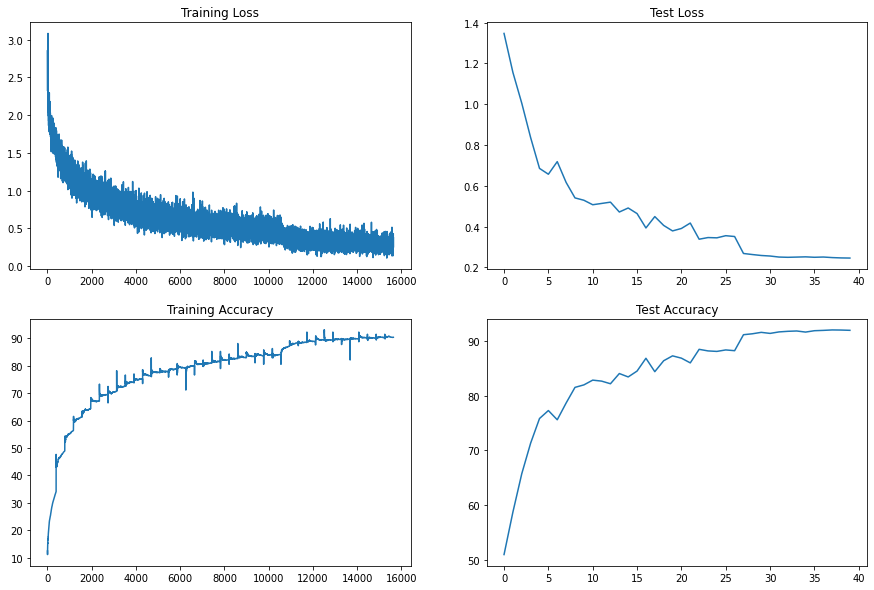

In [23]:
plot_loss_accuracy(train_losses, train_acc, test_losses, test_acc)

In [22]:
incorrect_image_list =[]
predicted_label_list =[]
correct_label_list = []
incorrect_image_list, predicted_label_list, correct_label_list = incorrect_image(incorrect_image_list, predicted_label_list, correct_label_list)

/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


## Display Misclassified Images

/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for im

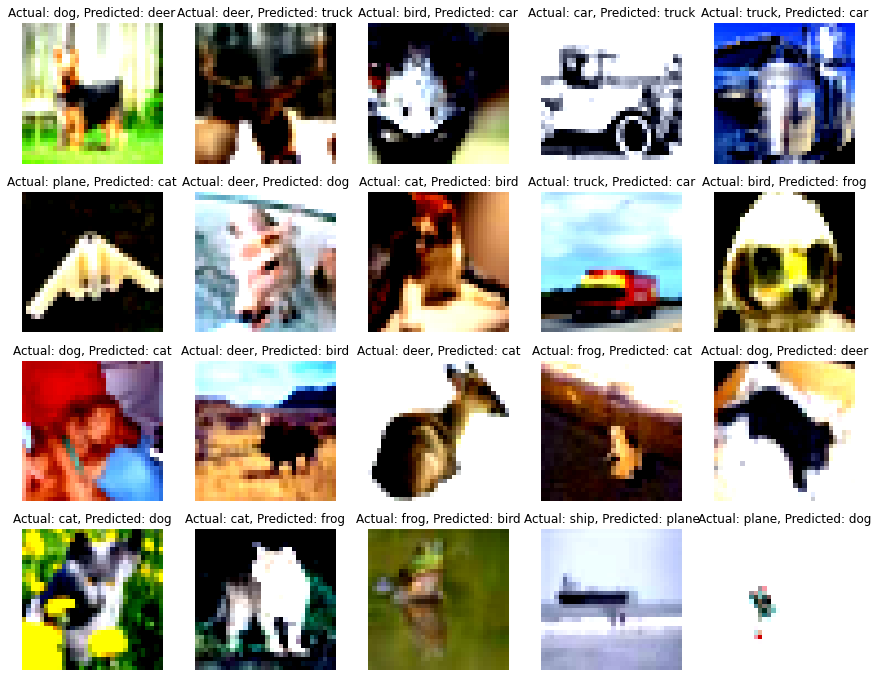

In [25]:
display_misclassfied_ciphar10_images(testloader, model, device, classes, 20)

In [29]:
PATH ='/content/data/cifar_res_88.pth'

In [30]:
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
#!cp -rf '/content/drive/My Drive/eva4_apis/utils' .

In [ ]:
#from utils.misclassified_image_utils import  display_misclassfied_ciphar10_images

In [37]:
predicted_lb =[]
correct_lb =[]
for i in range(20):
  #print("Predicted is",predicted_label_list[i])
  predicted_lb.append(predicted_label_list[i])
  #print("Correct is",correct_label_list[i])
  correct_lb.append(correct_label_list[i])

In [39]:
incorrect_images_disp  = incorrect_image_list[0:20]

In [40]:
predicted_label_list = predicted_label_list[0:20]

In [41]:
correct_label_list = predicted_label_list[0:20]

In [ ]:
#import os
#os.chdir('/content/drive/My Drive/GRAD')

20


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Process Grad get gradcame
input.size()= torch.Size([1, 3, 224, 224])
Write Cam Image
Proces

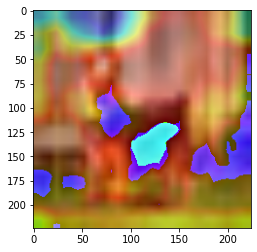

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

incorrect_images = []

for i in range(25) :
  img = incorrect_images_disp[i]
  img = img / 2 + 0.5
  img = img.cpu().numpy()
  img=np.transpose(img, (1, 2, 0))
  img=img*255
  incorrect_images.append(img)
  
print(len(incorrect_images))
cam_images=process_grad(incorrect_images,model)
plt.imshow(cam_images[0])

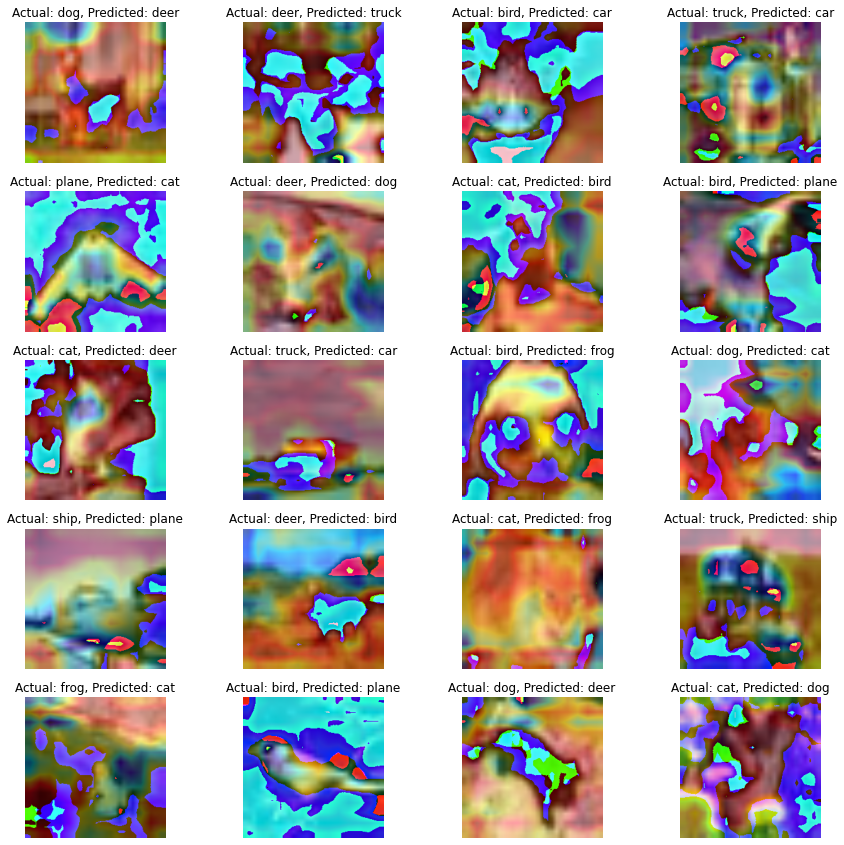

In [45]:
plt.figure(figsize=(15,15))
columns = 5
i= 0
    # Display the list of 25 misclassified images
for index, image in enumerate(cam_images) :
  ax = plt.subplot(5, 4, i+1)
  ax.set_title("Actual: " + str(classes[correct_lb[index]]) + ", Predicted: " + str(classes[predicted_lb[index]]))
  ax.axis('off')
    #plt.imshow(image)
  plt.imshow(image)
  i +=1
  if i==25:
    break